In [1]:
import glob
import ntpath
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

Processing latency.log ...


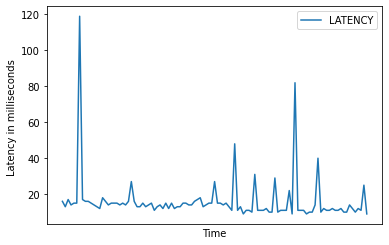

In [2]:
log_file = 'latency.log'
print(f'Processing {log_file} ...')

with open(log_file) as f:
    lines = f.readlines()
    data = {'LATENCY': []}

    for chunk in [lines[x:x+2] for x in range(0, len(lines), 2)]:
        start = int(chunk[0].split("Sending IOMessage - timestamp: ")[1])
        end = int(chunk[1].split("onMessageReceipt - timestamp: ")[1])
        diff = end - start
        data['LATENCY'].append(diff)

    df = pd.DataFrame(data)
    df.plot()
    plt.xticks([])
    plt.ylabel("Latency in milliseconds ")
    plt.xlabel("Time")
    name = ntpath.basename(log_file).split('.')[0]
    plt.savefig(fname=f'./plots/{name}.png', dpi=500)